# Natural Language Processing | Project

### Nehal Aggarwal 

### Ashish Verma 



### Mounting Google Drive

In [0]:
# Load the Drive helper and mount
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd
%cd /content/drive/My Drive/Term5/NLP/Project 


/content
/content/drive/My Drive/Term5/NLP/Project


#### Loading all required  paths

In [0]:
dataPath = '/content/drive/My Drive/Term5/NLP/Project/Dataset'
outputPath = '/content/drive/My Drive/Term5/NLP/Project/Output'
drug_train = dataPath + '/drugsComTrain_raw.tsv'
drug_test = dataPath + '/drugsComTest_raw.tsv'
glove_vectors_file = dataPath + '/word_embeddings/glove.840B.300d.txt'

### Loading Dataset and Pre-processing

#### Helper Methods

In [0]:
import pandas as pd

In [0]:
def readFile(fileName):
  filedata = pd.read_csv(fileName, delimiter='\t', header = None, skiprows=1)
  filedata.columns = ["id", "drugName", "condition", "review", "rating", "date", "usefulCount"]
  return filedata

In [0]:
def saveDataToCSV(df, file_name):
  df.to_csv(dataPath +'/'+file_name, sep='\t', encoding='utf-8', index=False)
  print(file_name+'...saved to csv')

#### Loading embeddings

#### Dataset | Creating validation Set | To be run only once

In [0]:
train_data_raw = readFile(drug_train)
test_data_raw = readFile(drug_test)

KeyboardInterrupt: ignored

In [0]:
##This code should be executed only in the initial phase to generate validation set.
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(train_data_raw, test_size=0.2)

In [0]:
#saveDataToCSV(train_data, 'drugsComTrain.csv')
#saveDataToCSV(valid_data, 'drugsComValid.csv')
#saveDataToCSV(test_data_raw, 'drugsComTest.csv')

#### Dataset | Loading

In [0]:
drug_train = dataPath + '/drugsComTrain.csv'
drug_test = dataPath + '/drugsComTest.csv'
drug_valid = dataPath + '/drugsComValid.csv'

In [0]:
train_data = readFile(drug_train)
valid_data = readFile(drug_valid)
test_data = readFile(drug_test)

In [0]:
print("Training set size {}".format(train_data.size))
print("Validation set size {}".format(valid_data.size))
print("Testing set size {}".format(test_data.size))

Training set size 903259
Validation set size 225820
Testing set size 376362


In [0]:
train_data.head(3)

,id,drugName,condition,review,rating,date,usefulCount
0,204048,Xerac AC,Hyperhidrosis,"""Wow! I had been struggling with excessive und...",10.0,"May 15, 2010",10
1,52764,Carbidopa / levodopa,Parkinson's Disease,"""I have been on Rytary for 10 months. At first...",4.0,"December 30, 2016",17
2,210591,Mirtazapine,Post Traumatic Stress Disorde,"""Hey at least this one doesn&#039;t make me m...",7.0,"September 1, 2017",6


#### Dataset | Analysing


Helper methods

In [0]:
import matplotlib.pyplot as plt
def drugsPerConditionGraph(data, groupby='', col='', asc=False): 
  top_drugCondition = data.groupby([groupby])[col].nunique().sort_values(ascending=asc)
  top_drugCondition[0:30].plot(kind="bar", figsize = (14,6), fontsize = 10,color="grey")
  plt.xlabel("Condition", fontsize = 20)
  plt.ylabel("No. of drugs", fontsize = 20)
  plt.title("The number of drugs per condition.", fontsize = 20)
  plt.figure()

In [0]:
def findMissing(data):
  missing = (data.isnull().sum()).sort_values(ascending=False)
  print("Missing value (%):", missing['condition']/data.shape[0] *100)
  return missing

In [0]:
def wrongConditions(data):
  x = data[data['condition']=='3</span> users found this comment helpful.']
  print(x)

In [0]:
print("Unique values of ids in Training set : " ,len(train_data['id'].values))
print("Instances in Training set: " ,train_data.shape[0])

Unique values of ids in Training set :  129037
Instances in Training set:  129037


In [0]:
train_data["strlen"] = train_data['review'].str.split().str.len()
valid_data["strlen"] = valid_data['review'].str.split().str.len()
test_data["strlen"] = test_data['review'].str.split().str.len()

import matplotlib.pyplot as plt
def reviewLength(data):
  fig = plt.figure(figsize=(10, 10)) 
  plt.xlabel('Sentence length')
  plt.ylabel('Number of sentences')
  plt.title('Length of Sentences')
  plt.hist(data["strlen"], bins=86)
  plt.show()

  maxLen = data["strlen"].max()
  minLen = data["strlen"].min()
  meanLen = data["strlen"].mean()

  print ( " Maximum review length %s \n Minimum review length %s \n Mean review length %s \n" %(maxLen, minLen, meanLen))

  a,b,c,d,e = 0,0,0,0,0
  for x in data['strlen']:
    if x >=1000:
      a = a+1
    if x >=750:
      b = b+1
    if x >=250:
      c = c+1
    if x >=100:
      d=d+1
    if x <100:
      e = e+1

  print (" No. of Reviews by Length \n %s >1000 words \n %s >750 words \n %s >250 words \n %s >100 words \n %s <100 words\n" % (a,b,c,d,e))

Missing value (%): 0.562629323372366
condition      726
strlen           0
usefulCount      0
date             0
rating           0
review           0
drugName         0
id               0
dtype: int64
            id             drugName  ... usefulCount strlen
504     149218               Mirena  ...           3     60
923     157932             Accutane  ...           3    111
1860    190392  Ortho Tri-Cyclen Lo  ...           3      9
6677     43648         LoSeasonique  ...           3    129
8880    133523        Proventil HFA  ...           3     22
...        ...                  ...  ...         ...    ...
123880   53668               Alesse  ...           3    102
125480  230747              Tazorac  ...           3     83
125906  220827       Loestrin 24 Fe  ...           3     94
126195   33108           Seasonique  ...           3     84
128882  213350              Nuvigil  ...           3     53

[61 rows x 8 columns]


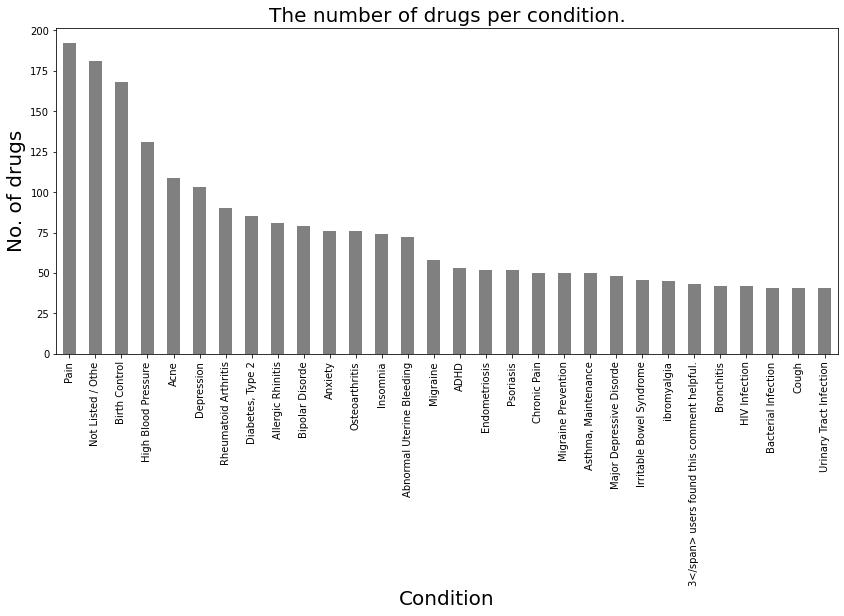

<Figure size 432x288 with 0 Axes>

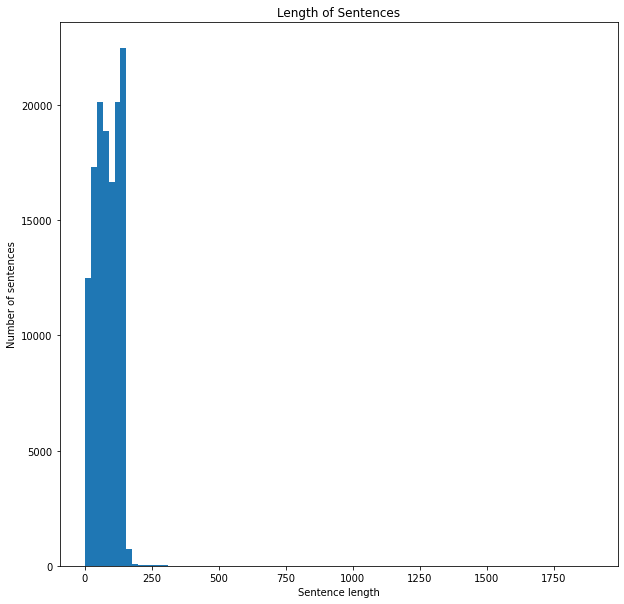

 Maximum review length 1894 
 Minimum review length 1 
 Mean review length 84.68728349233166 

 No. of Reviews by Length 
 3 >1000 words 
 8 >750 words 
 136 >250 words 
 52232 >100 words 
 76805 <100 words

Missing value (%): 0.5362678239305642
condition      173
strlen           0
usefulCount      0
date             0
rating           0
review           0
drugName         0
id               0
dtype: int64
           id               drugName  ... usefulCount strlen
79       6813                  Beyaz  ...           3     45
2509    26399               Sprintec  ...           3     14
3567   204167               Dilantin  ...           3     62
5525   175861               Levaquin  ...           3     71
7265    94908                Abilify  ...           3     65
7613    43639           LoSeasonique  ...           3     45
9094   123345                   Apri  ...           3     67
9708   110557              Nexplanon  ...           3     82
10036   33655  Microgestin Fe 1 / 20  ..

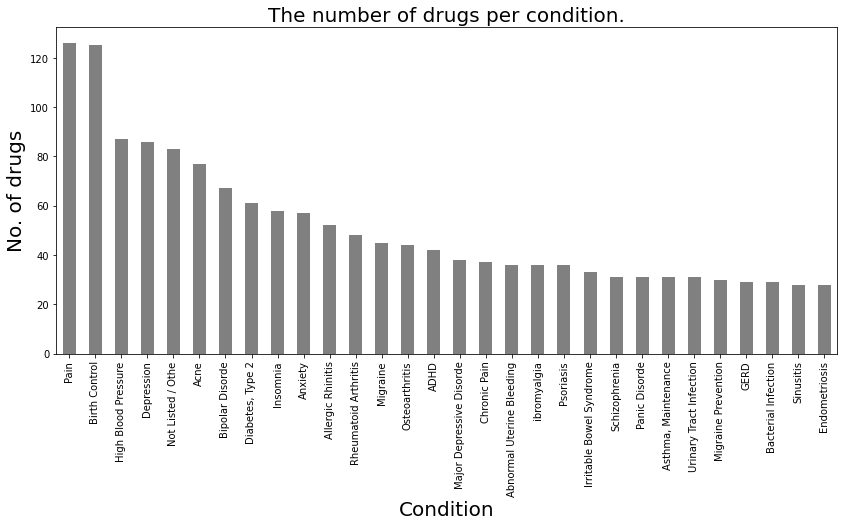

<Figure size 432x288 with 0 Axes>

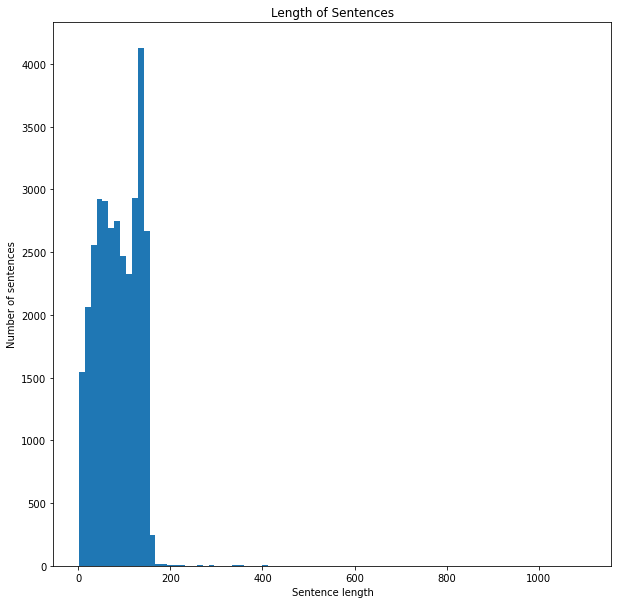

 Maximum review length 1103 
 Minimum review length 1 
 Mean review length 84.74987600743955 

 No. of Reviews by Length 
 2 >1000 words 
 2 >750 words 
 32 >250 words 
 13116 >100 words 
 19144 <100 words

Missing value (%): 0.5486738831231633
condition      295
strlen           0
usefulCount      0
date             0
rating           0
review           0
drugName         0
id               0
dtype: int64
           id                    drugName  ... usefulCount strlen
4786   159772                     Bactrim  ...           3     50
5146    33106                  Seasonique  ...           3     76
6688   159222                    TriNessa  ...           3    108
12051  201835                  Lo / Ovral  ...           3     38
12105  176053                Neo-Poly-Dex  ...           3     66
12707   33648       Microgestin Fe 1 / 20  ...           3     96
16621  229987                   Lastacaft  ...           3     13
17066  187132                     Safyral  ...           3    

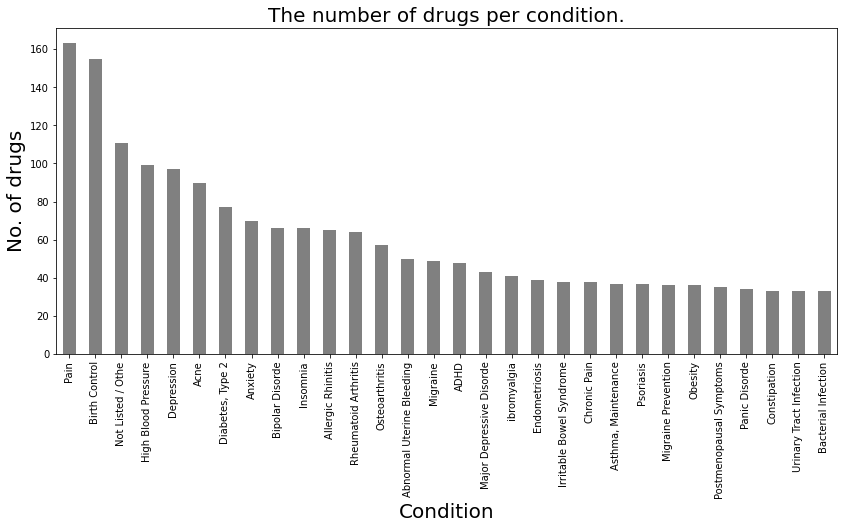

<Figure size 432x288 with 0 Axes>

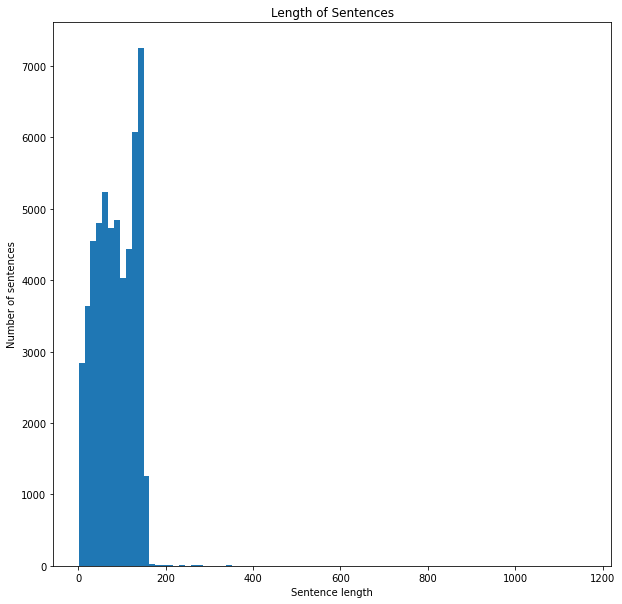

 Maximum review length 1162 
 Minimum review length 1 
 Mean review length 84.62950563553174 

 No. of Reviews by Length 
 1 >1000 words 
 1 >750 words 
 42 >250 words 
 21873 >100 words 
 31893 <100 words



In [0]:
for d in [train_data, valid_data, test_data]:
  drugsPerConditionGraph(d, 'condition', 'drugName')
  missingVal = findMissing(d)
  print(missingVal)
  wrongConditions(d)
  reviewLength(d)

#### Dataset | Cleaning

In [0]:
def removeSpanFromCondition(data):
  span_list = []
  for i,j in enumerate(data['condition']):
      if '</span>' in j:
          span_list.append(i)
  return data.drop(data.index[span_list], inplace = True)


In [0]:
def removeOneDrugCondition(data):
  oneDrug_list = []
  oneDrugCond = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
  oneDrugCond = pd.DataFrame(oneDrugCond).reset_index()
  condition_1 = oneDrugCond[oneDrugCond['drugName']==1]
  for i,j in enumerate(data['condition']):
      for c in list(condition_1['condition']):
          if j == c:
              oneDrug_list.append(i)
  return data.drop(data.index[oneDrug_list], inplace = True)

In [0]:
import re
from nltk.tokenize import RegexpTokenizer
def removePunctuationMarks(text):
  tokenizer = RegexpTokenizer(r'\w+')
  result = tokenizer.tokenize(text)
  nopuncttext = " ".join(result)
  return nopuncttext

In [0]:
def removeNonEnglishChars(text):
  text = re.sub(r'[^\x00-\x7f]',r'', text)
  return text

In [0]:
def removeUnderscore(text):
  text = text.replace("_", "");
  return text

In [0]:
def replaceApostrophe(text):
  text = text.replace("&#039;","\'")
  return text

In [0]:
def removeThings(text):
  t = replaceApostrophe(text)
  t = removePunctuationMarks(t)
  t = removeNonEnglishChars(t)
  t = removeUnderscore(t)
  return t

In [0]:
for d in [train_data, valid_data, test_data]:
  d.dropna(axis=0, inplace = True)
  removeSpanFromCondition(d)
  removeOneDrugCondition(d)

In [0]:
train_data.head(3)

,id,drugName,condition,review,rating,date,usefulCount,strlen
0,204048,Xerac AC,Hyperhidrosis,"""Wow! I had been struggling with excessive und...",10.0,"May 15, 2010",10,130
1,52764,Carbidopa / levodopa,Parkinson's Disease,"""I have been on Rytary for 10 months. At first...",4.0,"December 30, 2016",17,148
2,210591,Mirtazapine,Post Traumatic Stress Disorde,"""Hey at least this one doesn&#039;t make me m...",7.0,"September 1, 2017",6,86


In [0]:
train_data['clean_review'] = train_data['review'].apply(removeThings)
valid_data['clean_review'] = valid_data['review'].apply(removeThings)
test_data['clean_review'] = test_data['review'].apply(removeThings)

In [0]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [0]:
 train_data.head(3)


,id,drugName,condition,review,rating,date,usefulCount,clean_review
0,204048,Xerac AC,Hyperhidrosis,"""Wow! I had been struggling with excessive und...",10.0,"May 15, 2010",10,Wow I had been struggling with excessive under...
1,52764,Carbidopa / levodopa,Parkinson's Disease,"""I have been on Rytary for 10 months. At first...",4.0,"December 30, 2016",17,I have been on Rytary for 10 months At first i...
2,210591,Mirtazapine,Post Traumatic Stress Disorde,"""Hey at least this one doesn&#039;t make me m...",7.0,"September 1, 2017",6,Hey at least this one doesn t make me manic an...


In [0]:
train_data['clean_review']
valid_data['clean_review']
test_data['clean_review']

0        I ve tried a few antidepressants over the year...
1        My son has Crohn s disease and has done very w...
2                              Quick reduction of symptoms
3        Contrave combines drugs that were used for alc...
4        I have been on this birth control for one cycl...
                               ...                        
53760    I started taking Apri about 7 months ago My br...
53762    I ve been taking Lexapro escitaploprgram since...
53763    I m married 34 years old and I have no kids Ta...
53764    I was prescribed Nucynta for severe neck shoul...
53765                                             It works
Name: clean_review, Length: 52858, dtype: object

In [0]:
train_data = train_data.loc[train_data["strlen"] <= 200]
valid_data = valid_data.loc[valid_data["strlen"] <= 200]
test_data = test_data.loc[test_data["strlen"] <= 200]

#### Dataset | Analyses Post cleaning

Missing value (%): 0.0
clean_review    0
strlen          0
usefulCount     0
date            0
rating          0
review          0
condition       0
drugName        0
id              0
dtype: int64
Empty DataFrame
Columns: [id, drugName, condition, review, rating, date, usefulCount, strlen, clean_review]
Index: []


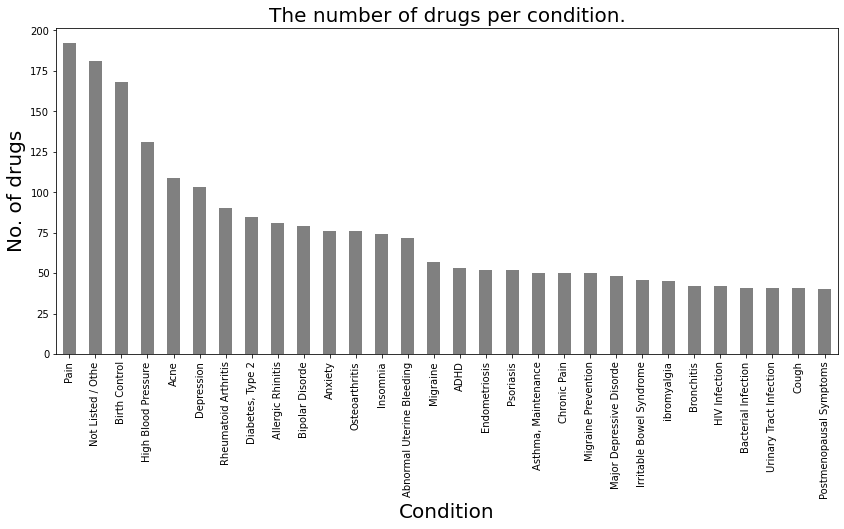

<Figure size 432x288 with 0 Axes>

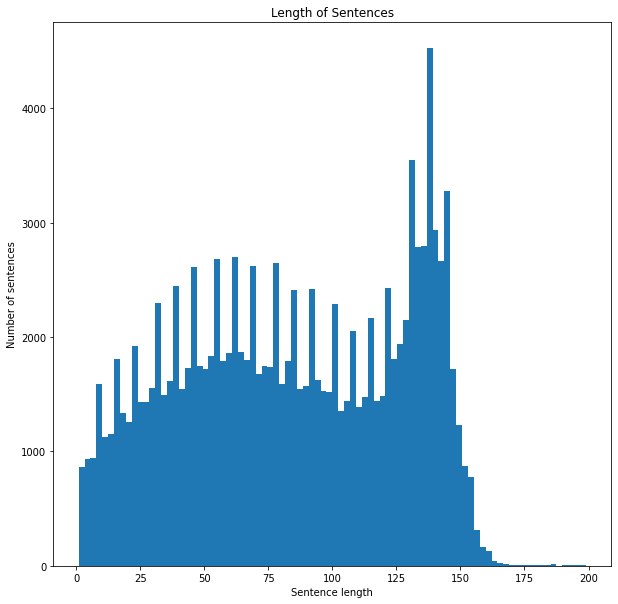

 Maximum review length 199 
 Minimum review length 1 
 Mean review length 84.33921916243155 

 No. of Reviews by Length 
 0 >1000 words 
 0 >750 words 
 0 >250 words 
 51355 >100 words 
 75560 <100 words

Missing value (%): 0.0
clean_review    0
strlen          0
usefulCount     0
date            0
rating          0
review          0
condition       0
drugName        0
id              0
dtype: int64
Empty DataFrame
Columns: [id, drugName, condition, review, rating, date, usefulCount, strlen, clean_review]
Index: []


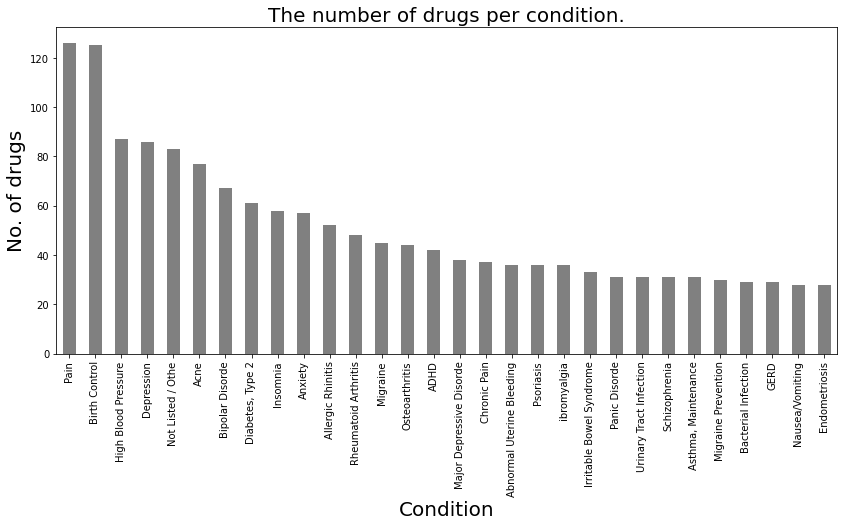

<Figure size 432x288 with 0 Axes>

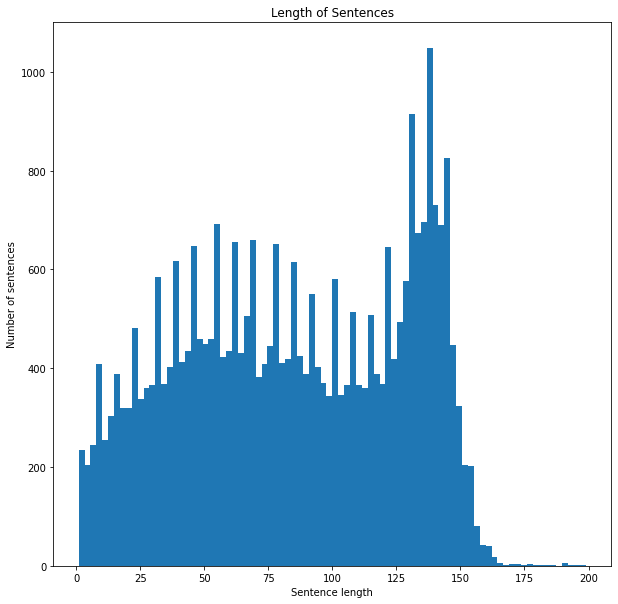

 Maximum review length 199 
 Minimum review length 1 
 Mean review length 84.59434799138259 

 No. of Reviews by Length 
 0 >1000 words 
 0 >750 words 
 0 >250 words 
 12896 >100 words 
 18668 <100 words

Missing value (%): 0.0
clean_review    0
strlen          0
usefulCount     0
date            0
rating          0
review          0
condition       0
drugName        0
id              0
dtype: int64
Empty DataFrame
Columns: [id, drugName, condition, review, rating, date, usefulCount, strlen, clean_review]
Index: []


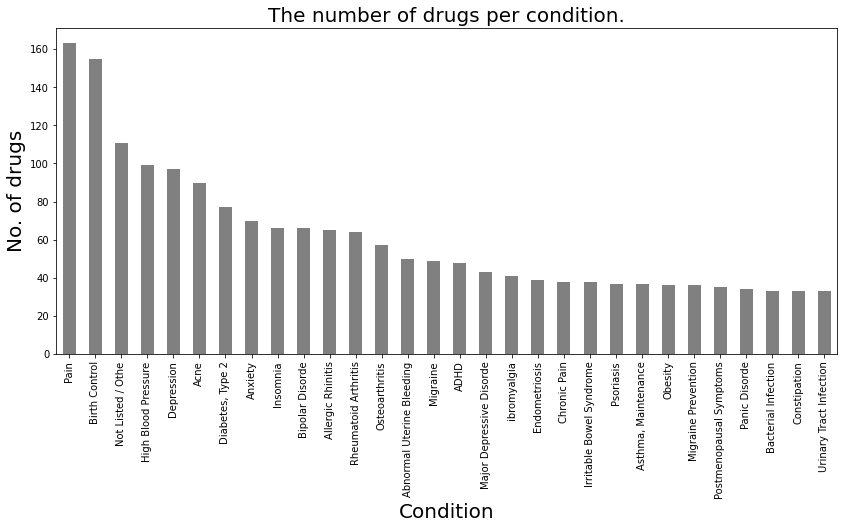

<Figure size 432x288 with 0 Axes>

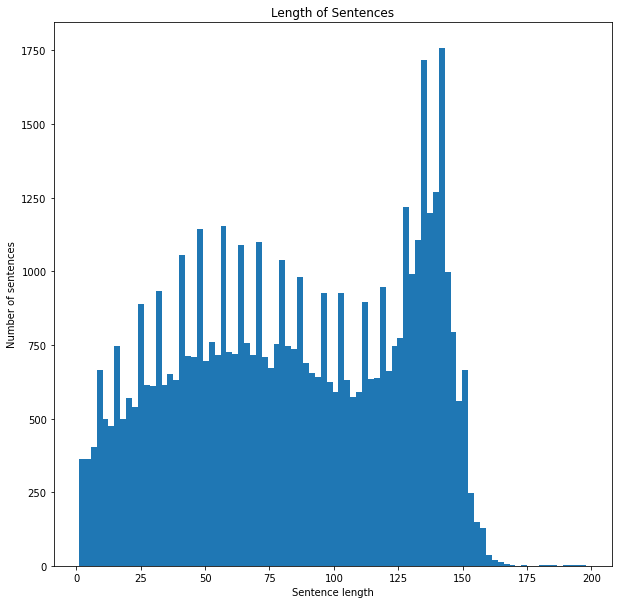

 Maximum review length 198 
 Minimum review length 1 
 Mean review length 84.47611380512198 

 No. of Reviews by Length 
 0 >1000 words 
 0 >750 words 
 0 >250 words 
 21504 >100 words 
 31288 <100 words



In [0]:
for d in [train_data, valid_data, test_data]:
  drugsPerConditionGraph(d, 'condition', 'drugName')
  missingVal = findMissing(d)
  print(missingVal)
  wrongConditions(d)
  reviewLength(d)

In [0]:
train_data.drop(['strlen'], axis=1, inplace=True)
valid_data.drop(['strlen'], axis=1, inplace=True)
test_data.drop(['strlen'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Dataset | Pre-Processing

In [0]:
all_data = pd.concat([train_data, valid_data, test_data])
pos_all_data = all_data[all_data["rating"]>5]
neg_all_data = all_data[all_data["rating"]<6]

In [0]:
from plotly import subplots
from collections import defaultdict
from nltk.corpus import stopwords 
import plotly.graph_objs as go
import plotly.offline as py

In [0]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def generateNgrams(text, n=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [0]:
def drawNgramChart(data, color, n):
    freqDict = defaultdict(int)
    for line in data["review"]:
        for word in generateNgrams(line, n):
            freqDict[word] += 1
            
    sortedFreqDict = pd.DataFrame(sorted(freqDict.items(), key=lambda x: x[1])[::-1])
    sortedFreqDict.columns = ["word", "wordcount"]
    sfd = sortedFreqDict.head(50)

    trace = go.Bar(
        y=sfd["word"].values[::-1],
        x=sfd["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [0]:
def createSubplots(tr0, tr1, n):
  fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.15,
                            subplot_titles=["Frequent " + str(n) +"-grams of rating 1 to 5", 
                                            "Frequent " + str(n) + "-grams of rating 6 to 10"])
  fig.append_trace(tr0, 1, 1)
  fig.append_trace(tr1, 1, 2)
  fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title= str(n) + "-gram Count Plots")
  py.iplot(fig, filename='word-plots')

In [0]:
trace0_4 = drawNgramChart(neg_all_data, 'grey',4)
trace1_4 = drawNgramChart(pos_all_data, 'grey',4)

trace0_5 = drawNgramChart(neg_all_data, 'grey',5)
trace1_5 = drawNgramChart(pos_all_data, 'grey',5)

In [0]:
createSubplots(trace0_4, trace1_4, 4)
createSubplots(trace0_5, trace1_5, 5)


Instance Review Preprocessing (Cleaning)

In [0]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stop_words.remove(i)

In [0]:
stemmer = SnowballStemmer('english')

def stemmetizeSentence(review):
    text = re.sub('[^a-zA-Z]', ' ', review)
    words = text.lower().split()
    meaningWords = [w for w in words if not w in stop_words]
    stemmedWords = [stemmer.stem(w) for w in meaningWords]
    return( ' '.join(stemmedWords))

In [0]:
train_data['clean_review'] = train_data['clean_review'].apply(stemmetizeSentence)
valid_data['clean_review'] = valid_data['clean_review'].apply(stemmetizeSentence)
test_data['clean_review'] = test_data['clean_review'].apply(stemmetizeSentence)

In [0]:
 train_data.head(3)
 x = train_data['clean_review'].head(5)
 print(x)

0    wow struggl excess underarm sweat sever year recent sweat made wors prescript medic wore black dark color month even wear sleeveless top sweat would sometim drip arm final went doctor frustrat immedi prescrib xerac ac note work mani patient use spare first night dab care main read potenti sting discomfort next day still sweat next night appli bit stung bit next day no sweat recommend                                                                  
1    rytari month first work well pill mg mg time day one bedtim sinc th month increas dyskinesia muscl cramp novemb unstopp go hospit relax iv er not know heck scream pain tri differ dose time believ deliveri defect uneven no control deliveri not think pd diseas could progress tha fast month quot stabl quot control sinemet everi two hour total mg day sleep well bent pain never know                                                                        
2    hey least one make manic suicid like zoloft prozac paxil mirtazipin seem gentl 

Model

In [0]:
train_data['sentiment'] = train_data["rating"].apply(lambda x: 1 if x > 5 else 0)
valid_data['sentiment'] = valid_data["rating"].apply(lambda x: 1 if x > 5 else 0)
test_data['sentiment'] = test_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [0]:
saveDataToCSV(train_data, 'cleaned_Train_data.csv')
saveDataToCSV(valid_data, 'cleaned_Valid_data.csv')
saveDataToCSV(test_data, 'cleaned_Test_data.csv')

cleaned_Train_data.csv...saved to csv
cleaned_Valid_data.csv...saved to csv
cleaned_Test_data.csv...saved to csv


For Text Polarity

In [0]:
drug_train = dataPath + '/cleaned_Train_data.csv'
drug_test = dataPath + '/cleaned_Test_data.csv'
drug_valid = dataPath + '/cleaned_Valid_data.csv'

In [0]:
def readFile1(fileName):
  filedata = pd.read_csv(fileName, delimiter='\t', header = None, skiprows=1)
  filedata.columns = ["id", "drugName", "condition", "review", "rating", "date", "usefulCount", "clean_review", "sentiment"]
  #filedata.drop(['review'], axis=1, inplace = True)
  filedata.dropna(axis=0, inplace=True)
  return filedata

In [0]:
train_data = readFile1(drug_train)
valid_data = readFile1(drug_valid)
test_data = readFile1(drug_test)

In [0]:
from textblob import TextBlob
def predictSentiment(data):
  blob = TextBlob(data)
  Predict_Sentiment = blob.sentiment.polarity
  return Predict_Sentiment

train_data["Predict_Sentiment"] = train_data["review"].apply(predictSentiment)
valid_data["Predict_Sentiment"] = valid_data["review"].apply(predictSentiment)
test_data["Predict_Sentiment"] = test_data["review"].apply(predictSentiment)

In [0]:
train_data.head(20)

,id,drugName,condition,review,rating,date,usefulCount,clean_review,sentiment
0,204048,Xerac AC,Hyperhidrosis,"""Wow! I had been struggling with excessive und...",10.0,"May 15, 2010",10,wow struggl excess underarm sweat sever year r...,1
1,52764,Carbidopa / levodopa,Parkinson's Disease,"""I have been on Rytary for 10 months. At first...",4.0,"December 30, 2016",17,rytari month first work well pill mg mg time d...,0
2,210591,Mirtazapine,Post Traumatic Stress Disorde,"""Hey at least this one doesn&#039;t make me m...",7.0,"September 1, 2017",6,hey least one make manic suicid like zoloft pr...,1
3,131610,Effexor XR,Major Depressive Disorde,"""I never write reviews but I figured I had to ...",10.0,"February 10, 2017",26,never write review figur share truli life chan...,1
4,132248,Ativan,Anxiety,"""This medicine has saved my life on several oc...",10.0,"September 9, 2015",100,medicin save life sever occas develop physic a...,1
5,130137,Levonorgestrel,Birth Control,"""Mirena gave me my life back. Ever since I hit...",10.0,"September 3, 2014",63,mirena gave life back ever sinc hit puberti ye...,1
6,2516,Camrese,Birth Control,"""I have been taking this birth control for abo...",7.0,"July 12, 2017",1,take birth control year origin take lo seasoni...,1
7,23547,Methadone,Pain,"""I finally found a doctor who listened to me. ...",9.0,"May 22, 2009",21,final found doctor listen methadon god send lo...,1
8,177259,Duloxetine,ibromyalgia,"""I did not notice a change while taking this m...",2.0,"June 11, 2017",20,not notic chang take med still took year even ...,0
9,72030,Tramadol,Restless Legs Syndrome,"""Had restless legs for many years also had sci...",10.0,"July 11, 2016",42,restless leg mani year also sciatica prescrib ...,1
